
### Imran Sarwar 46588833 Assignment 2
# Deep Learning for Image Classification


In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading CSVs into dataframes
train_df = pd.read_csv('train.csv')
devtest_df = pd.read_csv('devtest.csv')
test_df = pd.read_csv('test.csv')

### 1.1 Exploration
Displaying one image from each partition set and class, as well as its dimensions.

Training Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


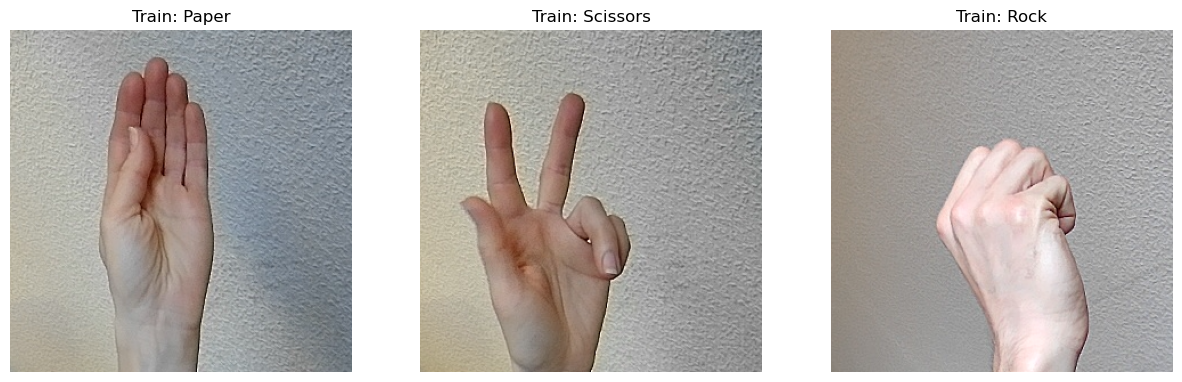

In [3]:
# Retrieving Paper Image
paper_train_df = train_df[train_df['label']=='paper']               # Separating all paper images into its own dataframe
train_paper_path = paper_train_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
train_paper_img = plt.imread(train_paper_path)                      # Reading image path

# Repeat for Rock
rock_train_df = train_df[train_df['label']=='rock']               
train_rock_path = rock_train_df.iloc[0]['path']                   
train_rock_img = plt.imread(train_rock_path)                      

# Repeat for Scissors 
scissors_train_df = train_df[train_df['label']=='scissors']               
train_scissors_path = scissors_train_df.iloc[0]['path']                   
train_scissors_img = plt.imread(train_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(train_paper_img)
axes[0].set_title('Train: Paper')
axes[0].axis('off')  

axes[1].imshow(train_scissors_img)
axes[1].set_title('Train: Scissors')
axes[1].axis('off')

axes[2].imshow(train_rock_img)
axes[2].set_title('Train: Rock')
axes[2].axis('off')
print("Training Dataset Images")
print("Paper Image Dimensions", train_paper_img.shape)
print("Scissors Image Dimensions", train_scissors_img.shape)
print("Rock Image Dimensions", train_rock_img.shape)

Test Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


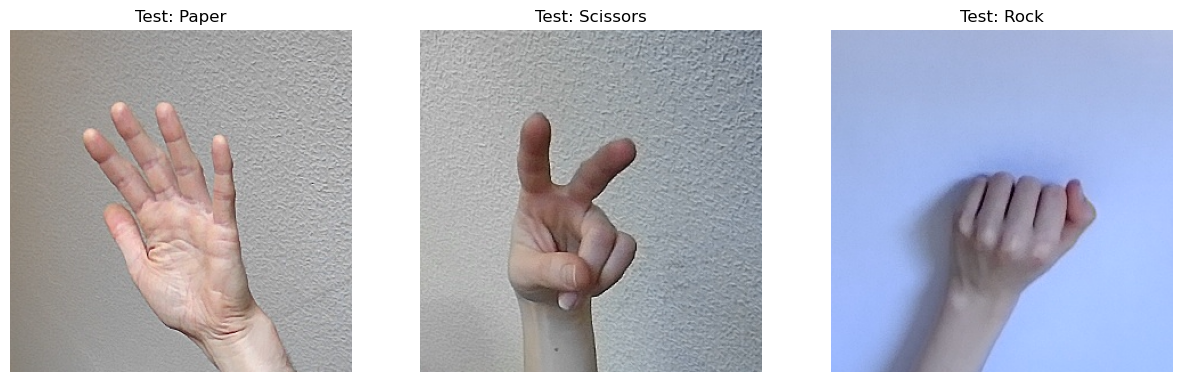

In [4]:
# Retrieving Paper Image
paper_test_df = test_df[test_df['label']=='paper']               # Separating all paper images into its own dataframe
test_paper_path = paper_test_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
test_paper_img = plt.imread(test_paper_path)                      # Reading image path

# Repeat for Rock
rock_test_df = test_df[test_df['label']=='rock']               
test_rock_path = rock_test_df.iloc[0]['path']                   
test_rock_img = plt.imread(test_rock_path)                      

# Repeat for Scissors 
scissors_test_df = test_df[test_df['label']=='scissors']               
test_scissors_path = scissors_test_df.iloc[0]['path']                   
test_scissors_img = plt.imread(test_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(test_paper_img)
axes[0].set_title('Test: Paper')
axes[0].axis('off')  

axes[1].imshow(test_scissors_img)
axes[1].set_title('Test: Scissors')
axes[1].axis('off')

axes[2].imshow(test_rock_img)
axes[2].set_title('Test: Rock')
axes[2].axis('off')
print("Test Dataset Images")
print("Paper Image Dimensions", test_paper_img.shape)
print("Scissors Image Dimensions", test_scissors_img.shape)
print("Rock Image Dimensions", test_rock_img.shape)

Devtest Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


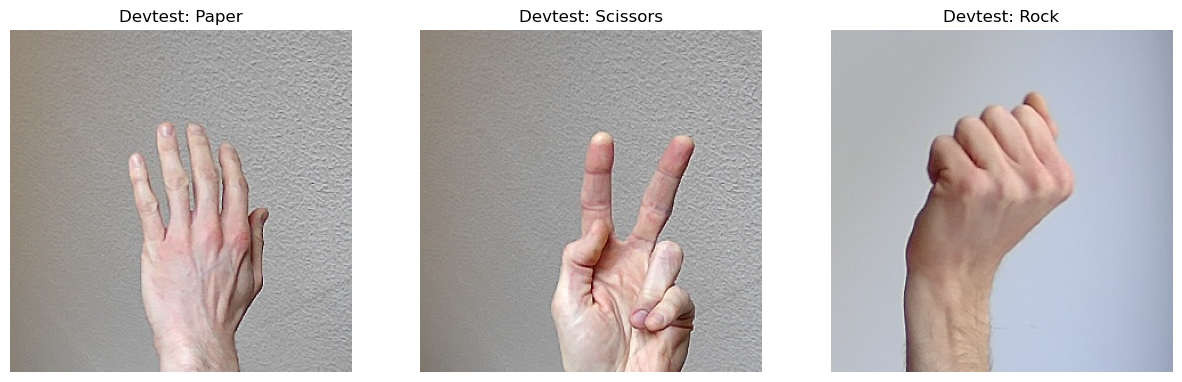

In [5]:
# Retrieving Paper Image
paper_devtest_df = devtest_df[devtest_df['label']=='paper']               # Separating all paper images into its own dataframe
devtest_paper_path = paper_devtest_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
devtest_paper_img = plt.imread(devtest_paper_path)                      # Reading image path

# Repeat for Rock
rock_devtest_df = devtest_df[devtest_df['label']=='rock']               
devtest_rock_path = rock_devtest_df.iloc[0]['path']                   
devtest_rock_img = plt.imread(devtest_rock_path)                      

# Repeat for Scissors 
scissors_devtest_df = devtest_df[devtest_df['label']=='scissors']               
devtest_scissors_path = scissors_devtest_df.iloc[0]['path']                   
devtest_scissors_img = plt.imread(devtest_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(devtest_paper_img)
axes[0].set_title('Devtest: Paper')
axes[0].axis('off')  

axes[1].imshow(devtest_scissors_img)
axes[1].set_title('Devtest: Scissors')
axes[1].axis('off')

axes[2].imshow(devtest_rock_img)
axes[2].set_title('Devtest: Rock')
axes[2].axis('off')
print("Devtest Dataset Images")
print("Paper Image Dimensions", devtest_paper_img.shape)
print("Scissors Image Dimensions", devtest_scissors_img.shape)
print("Rock Image Dimensions", devtest_rock_img.shape)

Number of Images by Class and Partition

In [7]:
print("Train - Paper Number of Images:", paper_train_df.shape[0])
print("Train - Scissors Number of Images:", scissors_train_df.shape[0])
print("Train - Rock Number of Images:", rock_train_df.shape[0])
print("Test - Paper Number of Images:", paper_test_df.shape[0])
print("Test - Scissors Number of Images:", scissors_test_df.shape[0])
print("Test - Rock Number of Images:", rock_test_df.shape[0])
print("Devtest - Paper Number of Images:", paper_devtest_df.shape[0])
print("Devtest - Scissors Number of Images:", scissors_devtest_df.shape[0])
print("Devtest - Rock Number of Images:", rock_devtest_df.shape[0])

Train - Paper Number of Images: 544
Train - Scissors Number of Images: 541
Train - Rock Number of Images: 544
Test - Paper Number of Images: 182
Test - Scissors Number of Images: 182
Test - Rock Number of Images: 182
Devtest - Paper Number of Images: 181
Devtest - Scissors Number of Images: 180
Devtest - Rock Number of Images: 181


### 1.2 Dataset and Dataloader Preparation

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2

device = "cuda" if torch.cuda.is_available() else "cpu"
print("The device is", device)

# Define Dataset Class
class ImageDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.label_map = {'rock': 0, 'paper': 1, 'scissors': 2}     # Map string to int

    def __len__(self):
        return len(self.data)

    def __getitem__(self, ix):
        img = cv2.imread(self.data.iloc[ix, 0])  # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Now it's RGB
        img = cv2.resize(img, (100, 100))
        img = torch.tensor(img).float().permute(2, 0, 1) / 255  

        label_str = self.data.iloc[ix, 1]
        label = self.label_map[label_str]  # convert to int label

        return torch.tensor(img).to(device).float(), \
           torch.tensor(label).long().to(device)

# Define Dataloaders

train_loader = DataLoader(ImageDataset('train.csv'),batch_size=32,shuffle=True)
test_loader = DataLoader(ImageDataset('test.csv'), batch_size=32, shuffle=False)
devtest_loader = DataLoader(ImageDataset('devtest.csv'), batch_size=32, shuffle=False)

The device is cpu


## Task 2 - Classification
### Task 2.1 Using ConvNets

Defining PyTorch Convolutional Neural Network Model

**Justification of Inputs:**

Layers: 2 convolutional blocks (for feature extraction);
1 fully connected block (the first linear layer + ReLU);
1 output layer (the final linear layer)

Kernel Size: 3×3 convolution kernel - standard/common choice for kernel size in machine learning algorithms.

Padding = 1 - to maintain spatial dimensions and prevent shrinking.

ReLU activation - enables the network to learn non-linear decision boundaries from the detected features.

Pooling size of 2 after each layer for downsampling/reducing each spatial dimension by half.

Flatten() - converts the 3D feature maps (32×25×25) into a 1D vector for the linear layers.

Linear(32x25x25) due to 100x100 image being halved twice (100>50>25). 

Linear(128x3) due to final output being 3 classes. 


In [10]:
import torch.nn as nn

my_model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3, padding=1),           # First convolutional block
    nn.ReLU(),
    nn.MaxPool2d(2),

    nn.Conv2d(16,32,kernel_size=3, padding=1),          # Second convolutional block
    nn.ReLU(),
    nn.MaxPool2d(2),


    nn.Flatten(),                                       #Flattening from 3D to 1D
    nn.Linear(32*25*25,128),                            # Fully connected block
    nn.ReLU(),
    nn.Linear(128,3)                                    # Output layer
    ).to(device)


Summary of Model

In [11]:
from torchsummary import summary
summary(my_model, (3,100,100))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 100, 100]        448
├─ReLU: 1-2                              [-1, 16, 100, 100]        --
├─MaxPool2d: 1-3                         [-1, 16, 50, 50]          --
├─Conv2d: 1-4                            [-1, 32, 50, 50]          4,640
├─ReLU: 1-5                              [-1, 32, 50, 50]          --
├─MaxPool2d: 1-6                         [-1, 32, 25, 25]          --
├─Flatten: 1-7                           [-1, 20000]               --
├─Linear: 1-8                            [-1, 128]                 2,560,128
├─ReLU: 1-9                              [-1, 128]                 --
├─Linear: 1-10                           [-1, 3]                   387
Total params: 2,565,603
Trainable params: 2,565,603
Non-trainable params: 0
Total mult-adds (M): 18.40
Input size (MB): 0.11
Forward/backward pass size (MB): 1.83
Params size (MB): 9.79
Estimated Total Size (MB): 

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 100, 100]        448
├─ReLU: 1-2                              [-1, 16, 100, 100]        --
├─MaxPool2d: 1-3                         [-1, 16, 50, 50]          --
├─Conv2d: 1-4                            [-1, 32, 50, 50]          4,640
├─ReLU: 1-5                              [-1, 32, 50, 50]          --
├─MaxPool2d: 1-6                         [-1, 32, 25, 25]          --
├─Flatten: 1-7                           [-1, 20000]               --
├─Linear: 1-8                            [-1, 128]                 2,560,128
├─ReLU: 1-9                              [-1, 128]                 --
├─Linear: 1-10                           [-1, 3]                   387
Total params: 2,565,603
Trainable params: 2,565,603
Non-trainable params: 0
Total mult-adds (M): 18.40
Input size (MB): 0.11
Forward/backward pass size (MB): 1.83
Params size (MB): 9.79
Estimated Total Size (MB): 

Defining functions required for training.

In [12]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

# Define model, loss function and optimizer
def get_model():
    model = my_model
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)   

    return model, loss_fn, optimizer


# Train one batch
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

# Calculate batch accuracy 
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

Training over 20 epochs using the training data, and testing against the validation data to determine when to stop training using the generated plot. 

In [13]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Initialize the model, loss, optimizer, DataLoaders
model, loss_fn, optimizer = get_model()

In [19]:
# 2. Lists to store accuracy/loss per epoch
train_accuracies = []
devtest_accuracies = []
losses = []
max_devtest_accuracy = 0

# 3. Set max number of epochs 
max_epochs = 20

# 4. Training loop
for epoch in range(max_epochs):
    epoch_accuracies = []
    epoch_losses = []
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{max_epochs}", unit=" batch")

    # 5. Train on all batches
    for batch in tqdm(train_loader):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        batch_accuracy = accuracy(x, y, model)
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(batch_accuracy)

    # 6. Evaluate on devtest set
    epoch_devtest_accuracies = []
    for batch in devtest_loader:
        x, y = batch
        epoch_devtest_accuracies.extend(accuracy(x, y, model))

    # 7. Store mean values
    epoch_loss = np.mean(epoch_losses)
    epoch_accuracy = np.mean(epoch_accuracies)
    epoch_devtest_accuracy = np.mean(epoch_devtest_accuracies)
    losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    devtest_accuracies.append(epoch_devtest_accuracy)
    print(f"  Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Validation Accuracy: {epoch_devtest_accuracy:.4f}")

    # 8. Save the model if the validation accuracy is the highest so far
    if epoch_devtest_accuracy > max_devtest_accuracy:
        torch.save(model.state_dict(), "best_model.pth")
        max_test_accuracy = epoch_devtest_accuracy

Epoch 1/20:   0%|          | 0/51 [00:00<?, ? batch/s]/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [00:29<00:00,  1.73it/s]


  Train Loss: 1.1207, Train Accuracy: 0.4131, Validation Accuracy: 0.5295


100%|██████████| 51/51 [00:32<00:00,  1.56it/s]


  Train Loss: 0.8097, Train Accuracy: 0.6875, Validation Accuracy: 0.7528


100%|██████████| 51/51 [00:29<00:00,  1.72it/s]


  Train Loss: 0.5346, Train Accuracy: 0.8072, Validation Accuracy: 0.7860


100%|██████████| 51/51 [00:28<00:00,  1.79it/s]


  Train Loss: 0.4293, Train Accuracy: 0.8521, Validation Accuracy: 0.8524


100%|██████████| 51/51 [00:28<00:00,  1.76it/s]


  Train Loss: 0.2827, Train Accuracy: 0.9104, Validation Accuracy: 0.8506


100%|██████████| 51/51 [00:28<00:00,  1.78it/s]


  Train Loss: 0.2036, Train Accuracy: 0.9435, Validation Accuracy: 0.9004


100%|██████████| 51/51 [00:30<00:00,  1.69it/s]


  Train Loss: 0.1528, Train Accuracy: 0.9595, Validation Accuracy: 0.9207


100%|██████████| 51/51 [00:28<00:00,  1.79it/s]


  Train Loss: 0.1005, Train Accuracy: 0.9804, Validation Accuracy: 0.9262


100%|██████████| 51/51 [00:30<00:00,  1.65it/s]


  Train Loss: 0.0734, Train Accuracy: 0.9865, Validation Accuracy: 0.9170


100%|██████████| 51/51 [00:29<00:00,  1.76it/s]


  Train Loss: 0.0735, Train Accuracy: 0.9896, Validation Accuracy: 0.9336


100%|██████████| 51/51 [00:28<00:00,  1.79it/s]


  Train Loss: 0.0538, Train Accuracy: 0.9926, Validation Accuracy: 0.9004


100%|██████████| 51/51 [00:28<00:00,  1.80it/s]


  Train Loss: 0.1257, Train Accuracy: 0.9779, Validation Accuracy: 0.9244


100%|██████████| 51/51 [00:26<00:00,  1.93it/s]


  Train Loss: 0.0432, Train Accuracy: 0.9957, Validation Accuracy: 0.9354


100%|██████████| 51/51 [00:27<00:00,  1.84it/s]


  Train Loss: 0.0235, Train Accuracy: 0.9994, Validation Accuracy: 0.9446


100%|██████████| 51/51 [00:26<00:00,  1.91it/s]


  Train Loss: 0.0198, Train Accuracy: 0.9988, Validation Accuracy: 0.9557


100%|██████████| 51/51 [00:27<00:00,  1.84it/s]


  Train Loss: 0.0171, Train Accuracy: 1.0000, Validation Accuracy: 0.9539


100%|██████████| 51/51 [00:26<00:00,  1.89it/s]


  Train Loss: 0.0137, Train Accuracy: 0.9994, Validation Accuracy: 0.9557


100%|██████████| 51/51 [00:28<00:00,  1.81it/s]


  Train Loss: 0.0090, Train Accuracy: 0.9994, Validation Accuracy: 0.9391


100%|██████████| 51/51 [00:27<00:00,  1.84it/s]


  Train Loss: 0.0034, Train Accuracy: 1.0000, Validation Accuracy: 0.9520


100%|██████████| 51/51 [00:26<00:00,  1.89it/s]


  Train Loss: 0.0025, Train Accuracy: 1.0000, Validation Accuracy: 0.9539


/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/2189797719.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


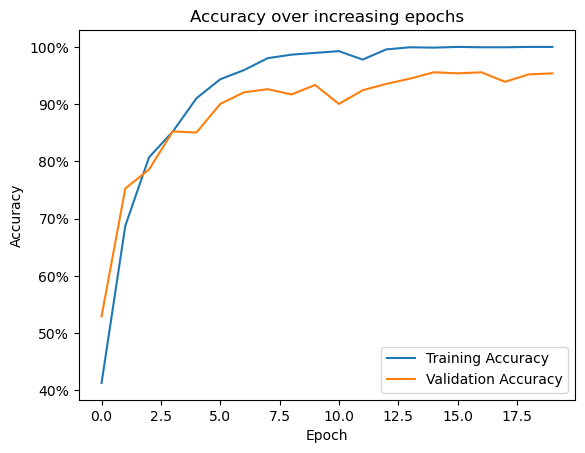

In [20]:
# display the variation of the training and validation accuracies over increasing epochs
plt.title('Accuracy over increasing epochs')
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(devtest_accuracies, label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()])
plt.legend()

Based on this plot, we see devtest accuracy peaks at epoch 14-16 before becoming unstable. After epoch 16, the training accuracy is almost equal to 1 and remains there for remaining epochs whilst the validation accuracy fluctuates around the same level, which indicates that the model is memorising the data and overfitting. Therefore we will choose 15 as the optimal number of epochs.

In [22]:
# Load the model with the highest validation accuracy
model.load_state_dict(torch.load("best_model.pth"))

# Compute the accuracy of the model on the test set
test_accuracies = []
for batch in test_loader:
  x, y = batch
  batch_accuracy = accuracy(x, y, model)
  test_accuracies.extend(batch_accuracy)
test_accuracy = np.mean(test_accuracies)
print(f"Test Accuracy: {test_accuracy:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Test Accuracy: 0.9615


## Task 2.2 Using Pre-Trained Models


Loading pre-trained model, freezing weights, and adding correct classification layer.

In [23]:
from torchvision import models

# Load pre-trained MobileNet model
mobilenet = models.mobilenet_v2(pretrained=True)

# Freeze all parameters in the base model
for param in mobilenet.parameters():
    param.requires_grad = False

# Get the number of features from the last layer
num_features = mobilenet.classifier[1].in_features

# Replace the classifier with a new one for our 3 classes
mobilenet.classifier = nn.Sequential(
    nn.Dropout(0.2),  # Keep the dropout for regularization
    nn.Linear(num_features, 3)  # Assuming 3 classes as in your original model
)

# Define model, loss function and optimizer
pre_model = mobilenet.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(pre_model.classifier.parameters(), lr=0.001)

/Users/imransarwar/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/imransarwar/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training pre-trained model with our data

In [25]:
# Lists to store accuracy/loss per epoch
train_accuracies = []
devtest_accuracies = []
losses = []
max_devtest_accuracy = 0

# Set max number of epochs 
max_epochs = 20

# Training 
for epoch in range(max_epochs):
    epoch_accuracies = []
    epoch_losses = []
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{max_epochs}", unit=" batch")

    # 5. Train on all batches
    for batch in tqdm(train_loader):
        x, y = batch
        batch_loss = train_batch(x, y, pre_model, optimizer, loss_fn)
        batch_accuracy = accuracy(x, y, pre_model)
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(batch_accuracy)

    # 6. Evaluate on devtest set
    epoch_devtest_accuracies = []
    for batch in devtest_loader:
        x, y = batch
        epoch_devtest_accuracies.extend(accuracy(x, y, pre_model))

    # 7. Store mean values
    epoch_loss = np.mean(epoch_losses)
    epoch_accuracy = np.mean(epoch_accuracies)
    epoch_devtest_accuracy = np.mean(epoch_devtest_accuracies)
    losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    devtest_accuracies.append(epoch_devtest_accuracy)
    print(f"  Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Validation Accuracy: {epoch_devtest_accuracy:.4f}")

    # 8. Save the model if the validation accuracy is the highest so far
    if epoch_devtest_accuracy > max_devtest_accuracy:
        torch.save(pre_model.state_dict(), "best_pre_model.pth")
        max_test_accuracy = epoch_devtest_accuracy

  0%|          | 0/51 [00:00<?, ?it/s]/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [01:39<00:00,  1.95s/it]


  Train Loss: 0.5399, Train Accuracy: 0.7403, Validation Accuracy: 0.9299


100%|██████████| 51/51 [01:35<00:00,  1.87s/it]


  Train Loss: 0.3132, Train Accuracy: 0.9355, Validation Accuracy: 0.9502


100%|██████████| 51/51 [01:31<00:00,  1.78s/it]


  Train Loss: 0.2507, Train Accuracy: 0.9533, Validation Accuracy: 0.9336


100%|██████████| 51/51 [01:30<00:00,  1.78s/it]


  Train Loss: 0.2338, Train Accuracy: 0.9613, Validation Accuracy: 0.9613


100%|██████████| 51/51 [01:23<00:00,  1.65s/it]


  Train Loss: 0.1972, Train Accuracy: 0.9662, Validation Accuracy: 0.9594


100%|██████████| 51/51 [01:26<00:00,  1.69s/it]


  Train Loss: 0.1587, Train Accuracy: 0.9718, Validation Accuracy: 0.9668


100%|██████████| 51/51 [01:25<00:00,  1.67s/it]


  Train Loss: 0.1648, Train Accuracy: 0.9742, Validation Accuracy: 0.9649


100%|██████████| 51/51 [01:29<00:00,  1.75s/it]


  Train Loss: 0.1697, Train Accuracy: 0.9779, Validation Accuracy: 0.9668


100%|██████████| 51/51 [01:23<00:00,  1.64s/it]


  Train Loss: 0.1515, Train Accuracy: 0.9791, Validation Accuracy: 0.9576


100%|██████████| 51/51 [01:24<00:00,  1.66s/it]


  Train Loss: 0.1546, Train Accuracy: 0.9767, Validation Accuracy: 0.9668


100%|██████████| 51/51 [01:26<00:00,  1.69s/it]


  Train Loss: 0.1373, Train Accuracy: 0.9834, Validation Accuracy: 0.9613


100%|██████████| 51/51 [01:21<00:00,  1.60s/it]


  Train Loss: 0.1330, Train Accuracy: 0.9871, Validation Accuracy: 0.9483


100%|██████████| 51/51 [01:23<00:00,  1.63s/it]


  Train Loss: 0.1493, Train Accuracy: 0.9761, Validation Accuracy: 0.9668


100%|██████████| 51/51 [01:30<00:00,  1.78s/it]


  Train Loss: 0.1261, Train Accuracy: 0.9896, Validation Accuracy: 0.9594


100%|██████████| 51/51 [01:21<00:00,  1.61s/it]


  Train Loss: 0.1282, Train Accuracy: 0.9847, Validation Accuracy: 0.9631


100%|██████████| 51/51 [01:23<00:00,  1.63s/it]


  Train Loss: 0.1285, Train Accuracy: 0.9871, Validation Accuracy: 0.9668


100%|██████████| 51/51 [01:21<00:00,  1.60s/it]


  Train Loss: 0.1255, Train Accuracy: 0.9877, Validation Accuracy: 0.9631


100%|██████████| 51/51 [01:19<00:00,  1.57s/it]


  Train Loss: 0.1166, Train Accuracy: 0.9871, Validation Accuracy: 0.9723


100%|██████████| 51/51 [01:21<00:00,  1.60s/it]


  Train Loss: 0.1227, Train Accuracy: 0.9865, Validation Accuracy: 0.9742


100%|██████████| 51/51 [01:22<00:00,  1.61s/it]


  Train Loss: 0.0976, Train Accuracy: 0.9914, Validation Accuracy: 0.9723


/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/2189797719.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


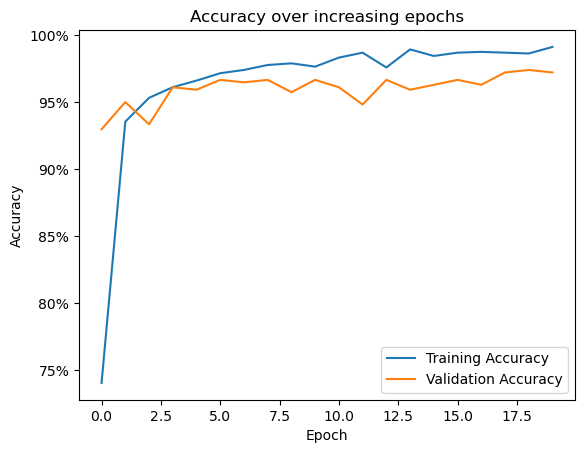

In [26]:
# display the variation of the training and validation accuracies over increasing epochs
plt.title('Accuracy over increasing epochs')
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(devtest_accuracies, label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()])
plt.legend()

The plot shows the validation accuracy peaks at around epochs 5-7 and plateaus therafter with some fluctuations, whilst the training accuracy continues to increase slightly. This indicates overfitting is occurring after epoch 7. Therefore we should choose to stop training after 6 epochs.


In [27]:
# Load the model with the highest test accuracy
pre_model.load_state_dict(torch.load("best_pre_model.pth"))

# Compute the accuracy of the model on the test set
test_accuracies = []
for batch in test_loader:
  x, y = batch
  batch_accuracy = accuracy(x, y, pre_model)
  test_accuracies.extend(batch_accuracy)
test_accuracy = np.mean(test_accuracies)
print(f"Test Accuracy: {test_accuracy:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Test Accuracy: 0.9780


### Model Comparison
**Overfitting Comparison**

Model 1 (Custom CNN):

Shows more significant overfitting with a larger gap between training accuracy (reaching nearly 100%) and test accuracy (peaking around 96-97%).
The training accuracy quickly reaches near-perfect levels while test accuracy lags behind by approximately 5-7 percentage points.

Model 2 (Pre-trained MobileNet):

Exhibits less overfitting with a smaller gap (about 3-4 percentage points) between training and validation accuracy and does not reach near 100% until the last epoch.

**Learning Capabilities**

Model 1:

Learns very quickly, reaching high training accuracy within the first 5-7 epochs.
Shows strong memorization of the training data but less ability to generalize and lower test accuracy.
Final test accuracy is 0.9689.

Model 2:

Reached high training accuracy very quickly, indicating faster learner capability than Model 1.
Better generalisation ability with validation performance closer to training performance as well as higher test accuracy.
Final test accuracy is 0.9835.

**Best Learning System**

Model 2 learned better overall, with a greater test accuracy and less overfitting.

**Tradeoffs**

Training Speed vs. Accuracy:

Model 1 (custom CNN) likely trained faster (timewise) due to its simpler architecture, but shows more overfitting.
Model 2 (MobileNet) probably required more computational resources and time due to its larger architecture, but provided better final test accuracy.

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


<Figure size 800x600 with 0 Axes>

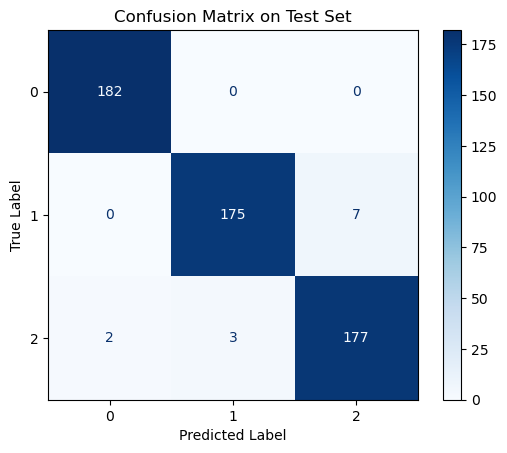

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pre_model.load_state_dict(torch.load("best_pre_model.pth")) # Load saved model
pre_model.eval()  # Set to eval mode for inference

# Collect predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():  
    for batch in test_loader:
        x, y = batch
        outputs = pre_model(x)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


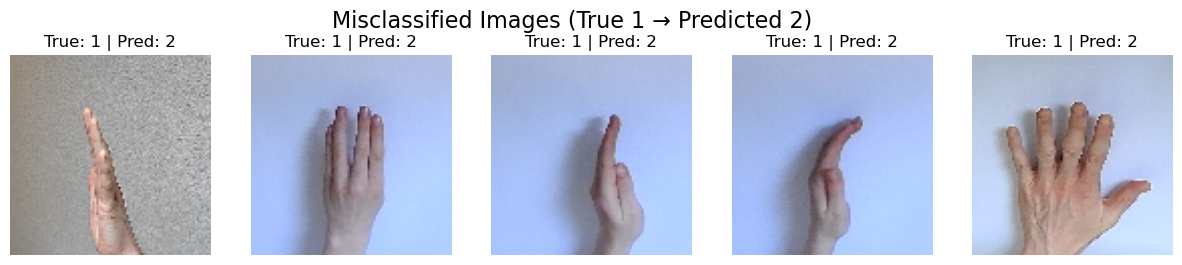

In [29]:
# 1. Make sure model is in evaluation mode
pre_model.eval()

# 2. Store misclassified images
misclassified_imgs = []
max_images = 5

with torch.no_grad():
    for batch in test_loader:
        x, y = batch
        outputs = pre_model(x)
        preds = torch.argmax(outputs, dim=1)

        # 3. Find where true label is 1 and predicted is 2
        mask = (y == 1) & (preds == 2)
        indices = torch.where(mask)[0]

        # 4. Collect 5 images
        for idx in indices:
            if len(misclassified_imgs) >= max_images:
                break
            misclassified_imgs.append(x[idx])

        if len(misclassified_imgs) >= max_images:
            break

# 5. Show the misclassified images
plt.figure(figsize=(15, 3))
for i, img in enumerate(misclassified_imgs):
    plt.subplot(1, len(misclassified_imgs), i + 1)
    if img.shape[0] == 1:  # grayscale image
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img.permute(1, 2, 0))  # RGB image
    plt.title("True: 1 | Pred: 2")
    plt.axis('off')

plt.suptitle("Misclassified Images (True 1 → Predicted 2)", fontsize=16)
plt.show()


## Task 3 - Deployment to Webcam


In [30]:
import os
import time

# function to capture images and save in the correct folder 

def capture_images(cap, label, time_lapse):
    if not os.path.exists(label):
        os.makedirs(label)
    start=time.time()
    while True:
        ret, frame = cap.read()
        frame = frame[100:600, 200:600]


        if ret:
            cv2.imshow('frame', frame)
            if time.time() - start > time_lapse:
                cv2.imwrite(f"{label}/{time.time()}.png", frame)
                start = time.time()
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break;
        else: 
            break;
    cv2.destroyAllWindows()


In [ ]:
import cv2
cap = cv2.VideoCapture(0) 
capture_images(cap,"webcam_scissors",0.5) # takes a photo from webcam every 0.5 seconds and stores it in webcam_scissors folder
cap.release()
cv2.waitKey(1) # prevents webcam screen from freezing

-1

In [ ]:
cap = cv2.VideoCapture(0)
capture_images(cap,"webcam_rock",10) # takes a photo from webcam every 0.5 seconds and stores it in webcam_rock folder
cap.release()
cv2.waitKey(1) # prevents webcam screen from freezing

-1

In [ ]:
cap = cv2.VideoCapture(0)
capture_images(cap,"webcam_paper",10) # takes a photo from webcam every 0.5 seconds and stores it in webcam_rock folder
cap.release()
cv2.waitKey(1) # prevents webcam screen from freezing

-1

Creating dataframes for stored images and printing number of images in each

In [31]:
dataset_path = "/Users/imransarwar/Documents/GitHub/assignment-2-imransarwar23"

df_scissors = [(os.path.join('webcam_scissors', f), 'scissors') for f in os.listdir(os.path.join(dataset_path, 'webcam_scissors'))]
df_paper = [(os.path.join('webcam_paper', f), 'paper') for f in os.listdir(os.path.join(dataset_path, 'webcam_paper'))]
df_rock = [(os.path.join('webcam_rock', f), 'rock') for f in os.listdir(os.path.join(dataset_path, 'webcam_rock'))]

print("Scissors Length:", len(df_scissors))
print("Paper Length:", len(df_paper))
print("Rock Length:", len(df_rock))


Scissors Length: 100
Paper Length: 100
Rock Length: 100


1. Shuffle the dataframes by label.
2. Partition each label dataframe into classes (50 for training, 25 for validation, 25 for testing), and join the partitioned scissors, paper and rock labels into a collective training/validation/test dataframe 
3. Shuffle again
4. Save to csv files that contain the path and label for each image.

In [32]:
import random

# Shuffle each dataframe to reduce bias when partitioning in next step
random.shuffle(df_scissors)
random.shuffle(df_paper)
random.shuffle(df_rock)

# Partition each class into train/devtest/test
train_files = df_scissors[:50] + df_paper[:50] + df_rock[:50]
devtest_files = df_scissors[50:75] + df_paper[50:75] + df_rock[50:75]
test_files = df_scissors[75:] + df_paper[75:] + df_rock[75:]

# Shuffle the partitions
random.shuffle(train_files)
random.shuffle(devtest_files)
random.shuffle(test_files)

# Save to CSV with headers `path,label`
new_train_df = pd.DataFrame(train_files, columns=['path', 'label'])
new_devtest_df = pd.DataFrame(devtest_files, columns=['path', 'label'])
new_test_df = pd.DataFrame(test_files, columns=['path', 'label'])

train_df.to_csv("webcam_train.csv", index=False)
devtest_df.to_csv("webcam_devtest.csv", index=False)
test_df.to_csv("webcam_test.csv", index=False)

In [33]:
new_train_df

path     label
0         webcam_rock/1744196757.641769.png      rock
1       webcam_paper/1744196981.9771898.png     paper
2         webcam_rock/1744196766.901367.png      rock
3        webcam_paper/1744196908.729522.png     paper
4     webcam_scissors/1744196562.191932.png  scissors
..                                      ...       ...
145   webcam_scissors/1744196510.503654.png  scissors
146       webcam_rock/1744196762.215421.png      rock
147      webcam_paper/1744196996.472624.png     paper
148      webcam_paper/1744196895.402566.png     paper
149  webcam_scissors/1744196648.6923258.png  scissors

[150 rows x 2 columns]

Training Dataset Images
Paper Image Dimensions (500, 400, 3)
Scissors Image Dimensions (500, 400, 3)
Rock Image Dimensions (500, 400, 3)


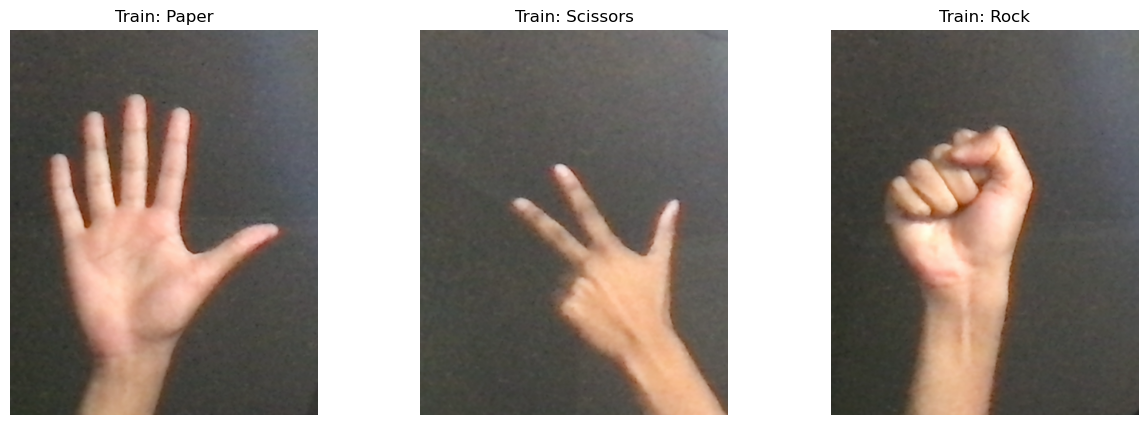

In [34]:
# Retrieving Paper Image
paper_train_df = new_train_df[new_train_df['label']=='paper']               # Separating all paper images into its own dataframe
train_paper_path = paper_train_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
train_paper_img = plt.imread(train_paper_path)                      # Reading image path

# Repeat for Rock
rock_train_df = new_train_df[new_train_df['label']=='rock']               
train_rock_path = rock_train_df.iloc[0]['path']                   
train_rock_img = plt.imread(train_rock_path)                      

# Repeat for Scissors 
scissors_train_df = new_train_df[new_train_df['label']=='scissors']               
train_scissors_path = scissors_train_df.iloc[0]['path']                   
train_scissors_img = plt.imread(train_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(train_paper_img)
axes[0].set_title('Train: Paper')
axes[0].axis('off')  

axes[1].imshow(train_scissors_img)
axes[1].set_title('Train: Scissors')
axes[1].axis('off')

axes[2].imshow(train_rock_img)
axes[2].set_title('Train: Rock')
axes[2].axis('off')
print("Training Dataset Images")
print("Paper Image Dimensions", train_paper_img.shape)
print("Scissors Image Dimensions", train_scissors_img.shape)
print("Rock Image Dimensions", train_rock_img.shape)

Test Dataset Images
Paper Image Dimensions (500, 400, 3)
Scissors Image Dimensions (500, 400, 3)
Rock Image Dimensions (500, 400, 3)


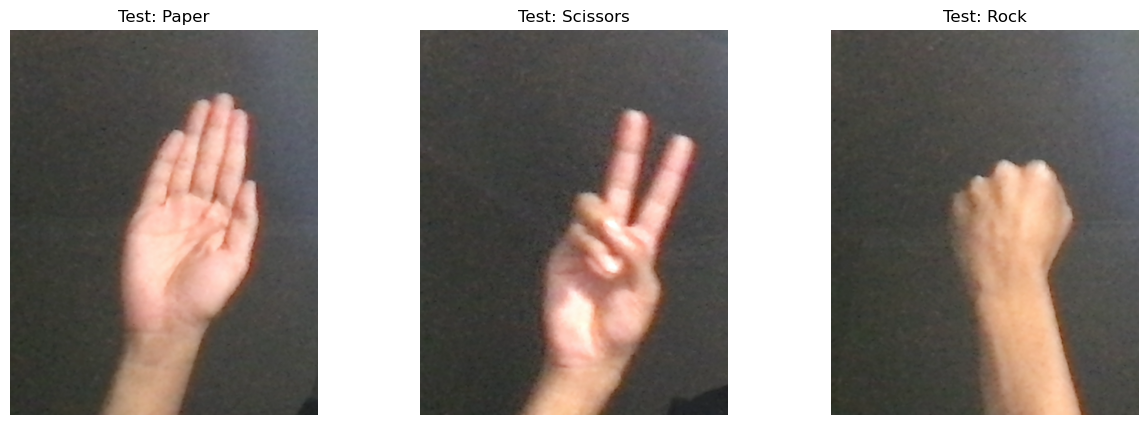

In [35]:
# Retrieving Paper Image
paper_test_df = new_test_df[new_test_df['label']=='paper']               # Separating all paper images into its own dataframe
test_paper_path = paper_test_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
test_paper_img = plt.imread(test_paper_path)                      # Reading image path

# Repeat for Rock
rock_test_df = new_test_df[new_test_df['label']=='rock']               
test_rock_path = rock_test_df.iloc[0]['path']                   
test_rock_img = plt.imread(test_rock_path)                      

# Repeat for Scissors 
scissors_test_df = new_test_df[new_test_df['label']=='scissors']               
test_scissors_path = scissors_test_df.iloc[0]['path']                   
test_scissors_img = plt.imread(test_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(test_paper_img)
axes[0].set_title('Test: Paper')
axes[0].axis('off')  

axes[1].imshow(test_scissors_img)
axes[1].set_title('Test: Scissors')
axes[1].axis('off')

axes[2].imshow(test_rock_img)
axes[2].set_title('Test: Rock')
axes[2].axis('off')
print("Test Dataset Images")
print("Paper Image Dimensions", test_paper_img.shape)
print("Scissors Image Dimensions", test_scissors_img.shape)
print("Rock Image Dimensions", test_rock_img.shape)

Devtest Dataset Images
Paper Image Dimensions (500, 400, 3)
Scissors Image Dimensions (500, 400, 3)
Rock Image Dimensions (500, 400, 3)


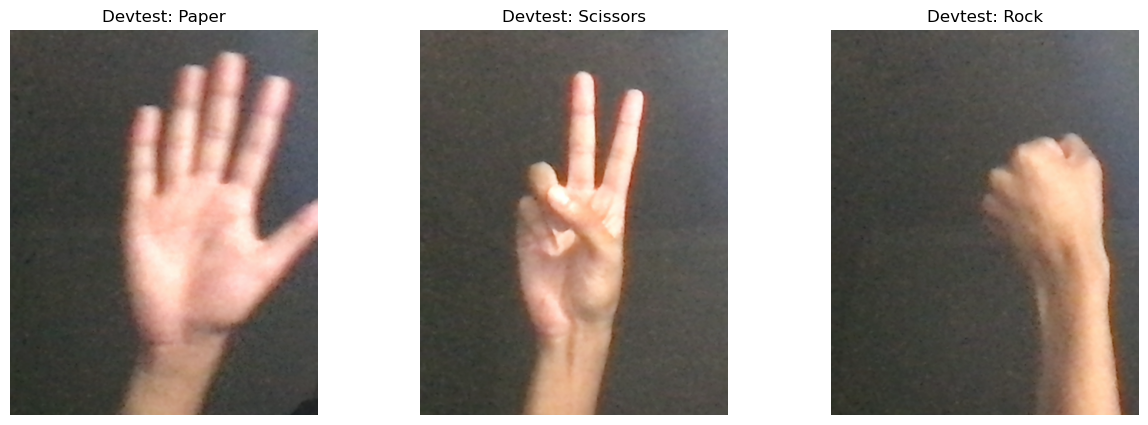

In [36]:
# Retrieving Paper Image
paper_devtest_df = new_devtest_df[new_devtest_df['label']=='paper']               # Separating all paper images into its own dataframe
devtest_paper_path = paper_devtest_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
devtest_paper_img = plt.imread(devtest_paper_path)                      # Reading image path

# Repeat for Rock
rock_devtest_df = new_devtest_df[new_devtest_df['label']=='rock']               
devtest_rock_path = rock_devtest_df.iloc[0]['path']                   
devtest_rock_img = plt.imread(devtest_rock_path)                      

# Repeat for Scissors 
scissors_devtest_df = new_devtest_df[new_devtest_df['label']=='scissors']               
devtest_scissors_path = scissors_devtest_df.iloc[0]['path']                   
devtest_scissors_img = plt.imread(devtest_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(devtest_paper_img)
axes[0].set_title('Devtest: Paper')
axes[0].axis('off')  

axes[1].imshow(devtest_scissors_img)
axes[1].set_title('Devtest: Scissors')
axes[1].axis('off')

axes[2].imshow(devtest_rock_img)
axes[2].set_title('Devtest: Rock')
axes[2].axis('off')
print("Devtest Dataset Images")
print("Paper Image Dimensions", devtest_paper_img.shape)
print("Scissors Image Dimensions", devtest_scissors_img.shape)
print("Rock Image Dimensions", devtest_rock_img.shape)

The main difference between the webcam images and the original images is the skin colour of the hand and the background of the images. If the model was overfitted, then it may have some difficulties classifying these images.

### 3.2 Fine-tuning and Testing

In [37]:
# New dataloaders for partition sets
new_train_loader = DataLoader(ImageDataset("webcam_train.csv"), batch_size=32, shuffle=True)
new_devtest_loader = DataLoader(ImageDataset("webcam_devtest.csv"), batch_size=32, shuffle=False)
new_test_loader = DataLoader(ImageDataset("webcam_test.csv"), batch_size=32, shuffle=False)

# Load the model with the highest test accuracy
pre_model.load_state_dict(torch.load("best_pre_model.pth"))

# Compute the accuracy of the model on the test set
test_accuracies = []
for batch in new_test_loader:
  x, y = batch
  batch_accuracy = accuracy(x, y, pre_model)
  test_accuracies.extend(batch_accuracy)
test_accuracy = np.mean(test_accuracies)
print(f"Test Accuracy: {test_accuracy:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Test Accuracy: 0.9780


In [38]:
# Training/Fine-Tuning using new webcam images

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(pre_model.parameters(), lr=1e-4) 
best_dev_accuracy = 0

for epoch in range(10):  
    print(f"Epoch {epoch+1}")
    pre_model.train()

    epoch_losses = []
    epoch_accuracies = []

    for x, y in tqdm(new_train_loader):
        optimizer.zero_grad()
        preds = pre_model(x)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())
        epoch_accuracies.append((preds.argmax(1) == y).float().mean().item())

    # Evaluate on devtest
    pre_model.eval()
    dev_accuracies = []
    with torch.no_grad():
        for x, y in new_devtest_loader:
            preds = pre_model(x)
            acc = (preds.argmax(1) == y).float().mean().item()
            dev_accuracies.append(acc)

    mean_train_acc = np.mean(epoch_accuracies)
    mean_dev_acc = np.mean(dev_accuracies)

    print(f"Train Acc: {mean_train_acc:.4f}, Dev Acc: {mean_dev_acc:.4f}")

    if mean_dev_acc > best_dev_accuracy:
        best_dev_accuracy = mean_dev_acc
        torch.save(pre_model.state_dict(), "best_finetuned_model.pth")

Epoch 1


/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [00:45<00:00,  1.13it/s]


Train Acc: 0.9712, Dev Acc: 0.9778
Epoch 2


100%|██████████| 51/51 [00:39<00:00,  1.30it/s]


Train Acc: 0.9737, Dev Acc: 0.9650
Epoch 3


100%|██████████| 51/51 [00:38<00:00,  1.33it/s]


Train Acc: 0.9638, Dev Acc: 0.9705
Epoch 4


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


Train Acc: 0.9705, Dev Acc: 0.9705
Epoch 5


100%|██████████| 51/51 [00:39<00:00,  1.29it/s]


Train Acc: 0.9698, Dev Acc: 0.9705
Epoch 6


100%|██████████| 51/51 [00:37<00:00,  1.37it/s]


Train Acc: 0.9705, Dev Acc: 0.9723
Epoch 7


100%|██████████| 51/51 [00:38<00:00,  1.31it/s]


Train Acc: 0.9669, Dev Acc: 0.9741
Epoch 8


100%|██████████| 51/51 [01:08<00:00,  1.34s/it]


Train Acc: 0.9724, Dev Acc: 0.9686
Epoch 9


100%|██████████| 51/51 [01:17<00:00,  1.52s/it]


Train Acc: 0.9637, Dev Acc: 0.9668
Epoch 10


100%|██████████| 51/51 [01:14<00:00,  1.46s/it]


Train Acc: 0.9721, Dev Acc: 0.9705


In [39]:
pre_model.load_state_dict(torch.load("best_finetuned_model.pth"))
pre_model.eval()

test_accuracies = []
with torch.no_grad():
    for x, y in new_test_loader:
        preds = pre_model(x)
        acc = (preds.argmax(1) == y).float().mean().item()
        test_accuracies.append(acc)

final_test_acc = np.mean(test_accuracies)
print(f" Final Test Accuracy on Webcam Images: {final_test_acc:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


 Final Test Accuracy on Webcam Images: 0.9792


In [40]:
pre_model.load_state_dict(torch.load("best_finetuned_model.pth"))
pre_model.eval()

test_accuracies = []
with torch.no_grad():
    for x, y in test_loader:
        preds = pre_model(x)
        acc = (preds.argmax(1) == y).float().mean().item()
        test_accuracies.append(acc)

final_test_acc = np.mean(test_accuracies)
print(f"Final Test Accuracy on Original Test Images: {final_test_acc:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_75641/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Final Test Accuracy on Original Test Images: 0.9792
